# Travail pratique 2
*INF600F - Traitement d'images (H2022, UQÀM)*

In [1]:
# Importation des modules pertinents ici. 
# Assurez-vous d'inclure toute autre fonction que vous
# jugez nécessaires ici

import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage import color
from skimage import data
from scipy import ndimage

# Exercice 1 : Filtrage spatial (9 pts)

In [2]:
# Ajouter ici des cellules de code / markdown pour vos réponses

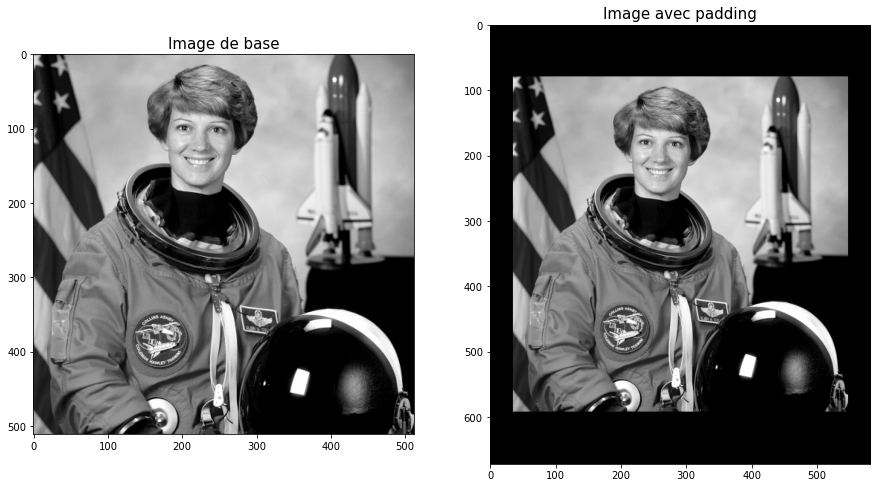

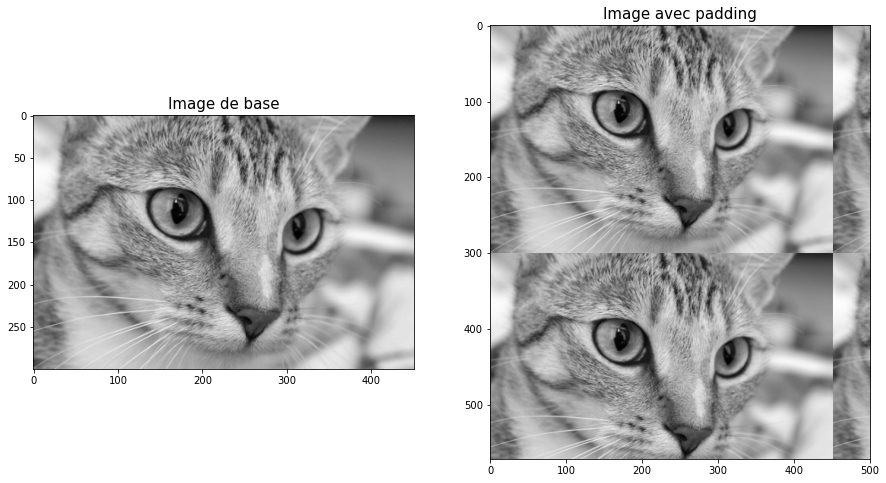

In [3]:
def imgPad(f, r, c, padType='zeros', loc='both'):
    """
    Ajoute un padding à une image
    
    Parameters
    ----------
    f : ndarray
        Image à modifier
    r : int
        Taille du padding pour les lignes
    c : int
        Taille du padding pour les colonnes
    padType : str
        Type de padding. Valeurs possibles : 'zeros', 'replicate'
    loc : str
        Position du padding. Valeurs possibles : 'both' ou 'post'
    Returns
    -------
    f_p : ndarray
        Image avec un padding ajouté
    """
   
    if padType == 'zeros' or padType is None:
        if loc == 'post':
            f_p = np.zeros((f.shape[0] + r, f.shape[1] + c))
            f_p[0:-r, 0:-c] = f
        elif loc == 'both':
            f_p = np.zeros((f.shape[0] + r*2, f.shape[1] + c*2))
            f_p[r:-r, c:-c] = f       
    elif padType == 'replicate':
        d = 3
        while((r > f.shape[0]*(d-2)) or (c > f.shape[1]*(d-2))):
            d += 2
        ff = np.tile(f, (d,d))
        if loc == 'post':
            f_p = ff[f.shape[0]:f.shape[0]*2 +r, f.shape[1]:f.shape[1]*2 +c]
        elif loc == 'both':
            f_p = ff[f.shape[0]-r:f.shape[0]*2 +r, f.shape[1]-c:f.shape[1]*2 +c]
    return f_p

img = color.rgb2gray(data.astronaut())
plt.figure(figsize=(15,15))

plt.subplot(121)
plt.title('Image de base', fontsize=15)
plt.imshow(img, cmap='gray')

g = imgPad(img, 80, 35)
plt.subplot(122)
plt.title('Image avec padding', fontsize=15)
plt.imshow(g, cmap='gray')
plt.show()

img2 = color.rgb2gray(data.cat())
plt.figure(figsize=(15,15))

plt.subplot(121)
plt.title('Image de base', fontsize=15)
plt.imshow(img2, cmap='gray')

g2 = imgPad(img2, 271, 50, padType='replicate', loc='post')
plt.subplot(122)
plt.title('Image avec padding', fontsize=15)
plt.imshow(g2, cmap='gray')
plt.show()

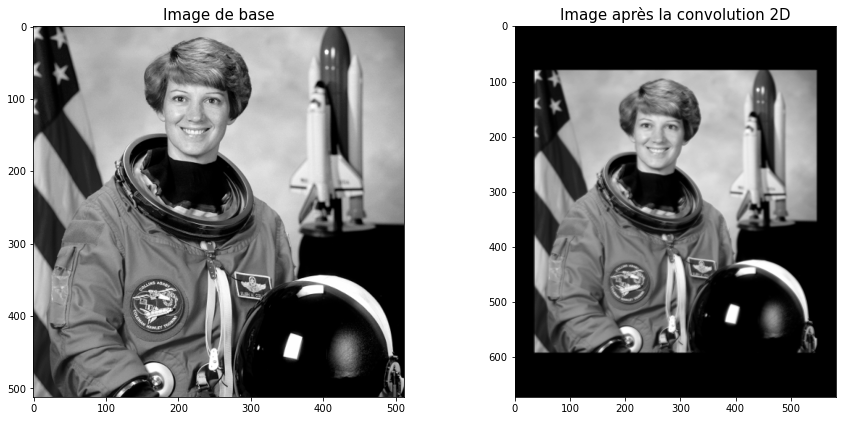

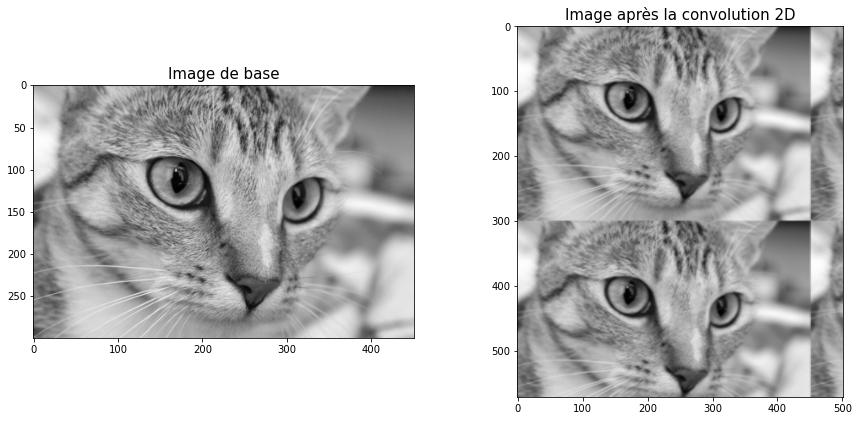

In [7]:
def twodConv(f, w, normalize=True):
    """ Effectue une convolution 2D de l'image f avec le noyau w

    Parameters
    ----------
    f : ndarray
        Image convoluer
    w : ndarray
        Noyau/filtre pour la convolution
    normalize : bool
        Si True, les intensités de l'image f doivent être normalisées entre 0 et 1
    Returns
    -------
    f_p : ndarray
        Image convoluée
    Notes
    -----
    * La fonction imgPad créée dans la partie précédente doit être utilisée.
    """
    if normalize:
        f = f / f.max()
    f_p = ndimage.convolve(f, w)
    return f_p

kernel = np.array([[1, 0, 0, 0], [0, 3, 0, 4], [0, 0, 0, 7], [0, 3, 0, 0]])

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Image de base', fontsize=15)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.title('Image après la convolution 2D', fontsize=15)
plt.imshow(twodConv(g, kernel, normalize=False), cmap='gray')

plt.figure(figsize=(15,15))
plt.subplot(223)
plt.title('Image de base', fontsize=15)
plt.imshow(img2, cmap='gray')
plt.subplot(224)
plt.title('Image après la convolution 2D', fontsize=15)
plt.imshow(twodConv(g2, kernel, normalize=False), cmap='gray')

plt.show()

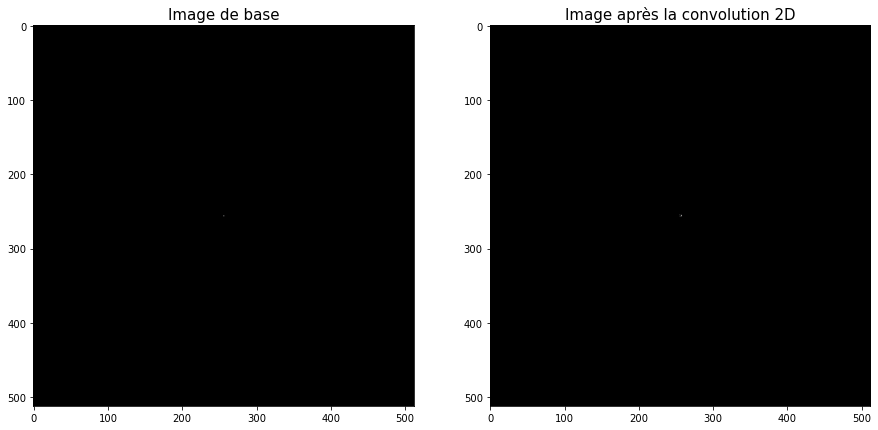

In [9]:
"""
Créez une image de taille 512×512 pixels qui se compose d’une impulsion unitaire à l’emplacement
(256, 256) et de zéros ailleurs. Utilisez cette image et un noyau de votre choix pour confirmer que
votre fonction effectue effectivement une convolution.
"""
h = np.zeros((512,512))
h[256,256] = 1

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.title('Image de base', fontsize=15)
plt.imshow(h, cmap='gray')
plt.subplot(122)
plt.title('Image après la convolution 2D', fontsize=15)
plt.imshow(twodConv(h, kernel, normalize=False), cmap='gray')
plt.show()

# Explication de résultats

Pour le numéro un, pour le padding avec des zéros, nous avons créé une matrice qui ne contenait que des zéros avec la nouvelle dimension (après padding), et ensuite, nous avons ajouté l'image de base au bon endroit. Pour le padding qui repète l'image, nous avons créé une matrice qui contenait x fois x (où x est impair et différent de 1), où l'image de base est au milieu, et nous avons pris pour le padding des parties des images autour.

Pour le numéro deux, nous avons appelé notre fonction au numéro un et nous avons appliqué une convulation.

Pour le numéro trois, on voulait vérifier que notre convulation fonctionnait, et c'est effectivement le cas, parce qu'on peut voir apparaître un point lumineux au centre de l'image transformée.

# Exercice 2 : Transformée de Fourier (6 pts)

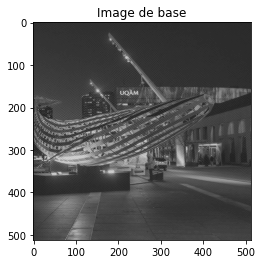

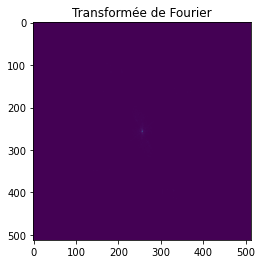

In [12]:
#Étape 1 et 2, affichage et transformation
img = imageio.imread('tp2_ex2.tif')
plt.title('Image de base'); plt.imshow(img,cmap='gray'); plt.show()

#TF
img_fft = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft)
plt.title('Transformée de Fourier'); plt.imshow(np.abs(img_fft)); plt.show()

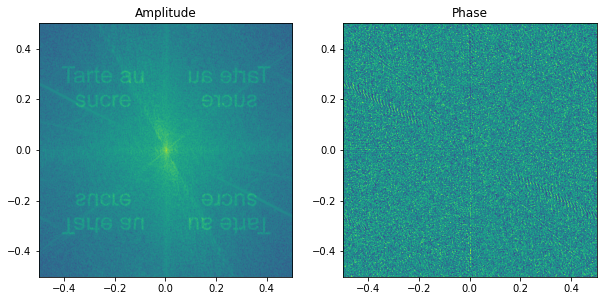

In [13]:
def display_fft(img_fft):
    """Affichage de l'amplitude et de la phase d'une transformée de Fourier
    
    Parameters
    ----------
    img_fft : ndarray
        Transformée de Fourier d'une image
    """
    freq = [-0.5, 0.5, -0.5, 0.5] # -1/2 et 1/2
    plt.figure(figsize=(10,10))
    plt.subplot(121); plt.title('Amplitude')
    plt.imshow(np.log(np.abs(img_fft)), extent=freq)
    plt.subplot(122); plt.title('Phase')
    plt.imshow(np.angle(img_fft), extent=freq);

    plt.show()
   
display_fft(img_fft)

## Trouver le message codé secret caché dans le domaine fréquentiel de l’image.
Tarte au sucre.

## Expliquez comment le message a été crypté dans l’image et pourquoi il n’était pas visible dans l’image originale.
Le message a été inséré dans la transformée de Fourier par des fréquences supplémentaires. Il n'est pas visible car les fréquences ajoutées sont trop faibles.

# Exercice 3 : Filtrage fréquentiel (10 pts)

In [14]:
#Partie 1
def lpFilterTF(type, P, Q, param):
    """Crée un filtre passe bas fréquentiel
    
    Parameters
    ----------
    type : str
        Type de filtre. Valeurs possibles : 'ideal', 'gaussian', 'butterworth'
    P : int
        Nombre de ligne du filtre
    Q : int
        Nombre de colonne du filtre
    param : float ou list
        Si type='ideal' ou type='gaussian', param=d0
        Si type='butterworth', type=[d0,n]

    Returns
    -------
    H : ndarray
        Filtre fréquentiel passe bas de taille PxQ
    
    """
    D = np.zeros((P,Q))
    H = np.zeros((P,Q))
    for line in range(P):
        for column in range(Q):
            x = (line - P/2) ** 2
            y = (column - Q/2) ** 2
            D[line, column] = (x + y) ** 0.5
    if type == 'ideal':
        for line in range(D.shape[0]):
            for column in range(D.shape[1]):
                if (D[line, column] <= param):
                    H[line, column] = 1
                else:
                    H[line, column] = 0
    elif type == 'gaussian':   
        H = np.exp(-((D/(2*param))**2))
    elif type == 'butterworth':
         H = 1 / (1 + ((D/param[0]) **(2*param[1])))
    H = H / np.max(H)
    return H

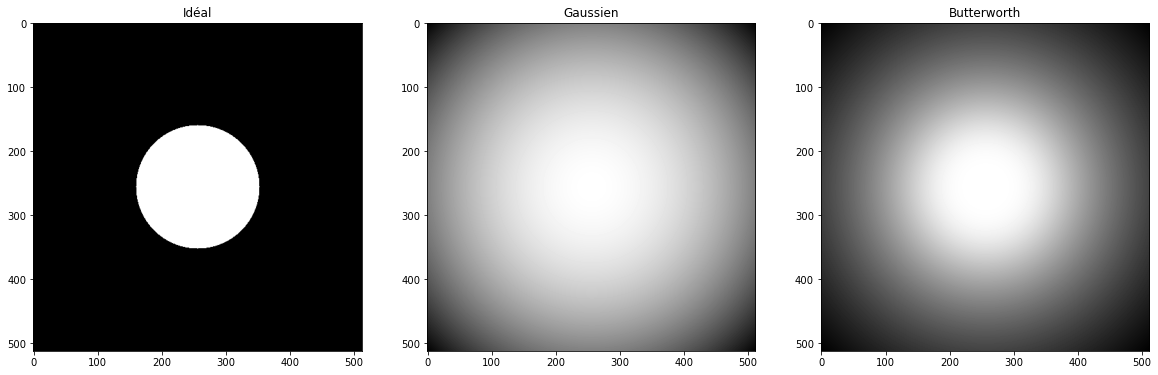

In [15]:
#Partie 2
filtre_ideal = lpFilterTF('ideal',512,512,96)
plt.figure(figsize=(20,20))
plt.subplot(131); plt.title('Idéal')
plt.imshow(np.abs(filtre_ideal,), cmap='gray');

filtre_gaus = lpFilterTF('gaussian',512,512,96)
plt.subplot(132); plt.title('Gaussien')
plt.imshow(np.log(np.abs(filtre_gaus,)), cmap='gray');

filtre_bw = lpFilterTF('butterworth',512,512,[96,2])
plt.subplot(133); plt.title('Butterworth')
plt.imshow(np.log(np.abs(filtre_bw)),cmap='gray'); plt.show()

In [ ]:
#Partie 3
img = imageio.imread('tp2_ex3.tif')
img_freq = np.fft.fft2(img)

img_f_ideal = img_freq * np.fft.fft2(lpFilterTF('ideal',img_freq.shape[0],img_freq.shape[1],50))
img_f_ideal = np.fft.ifft2(img_f_ideal).real
img_f_ideal = np.fft.ifftshift(img_f_ideal)
plt.figure(figsize=(20,20))
plt.subplot(131); plt.title('Idéal')
plt.imshow(img_f_ideal,cmap='gray');

img_f_gaus = img_freq * np.fft.fft2(lpFilterTF('gaussian',img_freq.shape[0],img_freq.shape[0],25))
img_f_gaus = np.fft.ifft2(img_f_gaus).real
img_f_gaus = np.fft.ifftshift(img_f_gaus)
plt.subplot(132); plt.title('Gaussian')
plt.imshow(img_f_gaus,cmap='gray');

img_f_bw = img_freq * np.fft.fft2(lpFilterTF('butterworth',img_freq.shape[0],img_freq.shape[0],[40,2]))
img_f_bw = np.fft.ifft2(img_f_bw).real
img_f_bw = np.fft.ifftshift(img_f_bw)
plt.subplot(133); plt.title('Butterworth')
plt.imshow(img_f_bw,cmap='gray'); plt.show()